In [20]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import qiskit.tools.visualization as qt

In [21]:
%matplotlib inline

In [38]:
secret = str(input("input some binary secret (example: 101101)"))
secret_size = len(secret)

input some binary secret (example: 101101)100101


In [40]:
qreg = QuantumRegister(secret_size +  1, 'q')
creg = ClassicalRegister(secret_size, 'c')

circuit = QuantumCircuit(qreg, creg)

In [41]:
def bernstein_vazirani(circuit, qreg, size):
    circuit.h(range(size))
    circuit.x(size)
    circuit.h(size)
    
    circuit.barrier()
    
    for control, target in enumerate(reversed(secret)):
        if target == '1':
            circuit.cx(control, size)
            
    circuit.barrier()
    
    circuit.h(range(size))
    
    circuit.barrier()
    
    circuit.measure(range(size), range(size))

In [42]:
bernstein_vazirani(circuit, qreg, secret_size)

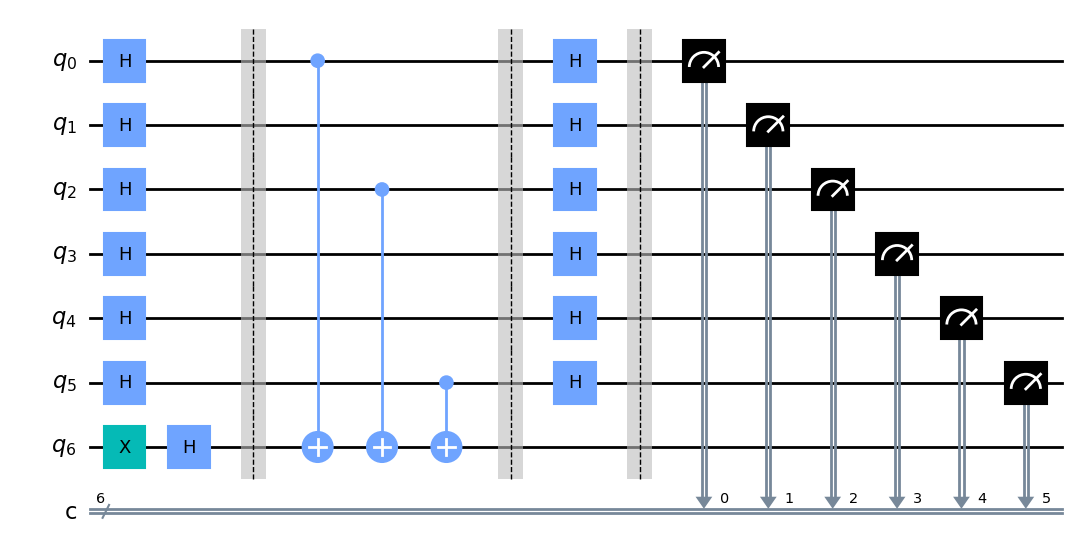

In [43]:
circuit.draw(output='mpl')

In [44]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'100101': 1}


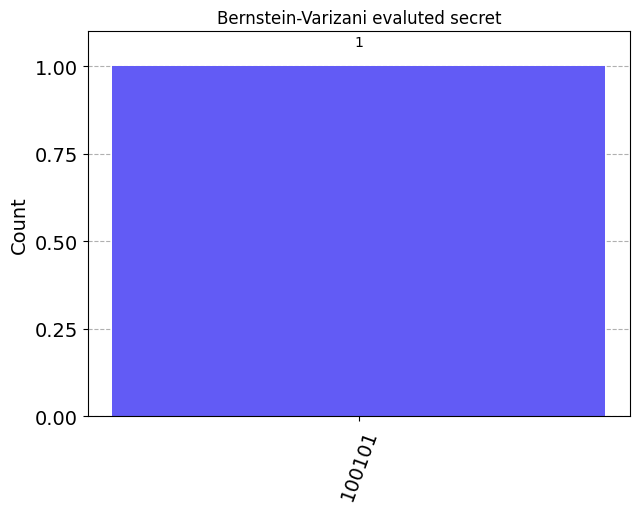

In [45]:
qt.plot_histogram(counts, color="#625BF5", title="Bernstein-Varizani evaluted secret")